# Analysis of the Physical Activity Patterns for a Subject in the "Inactive" Group
Among the 183 subjects, we classified them into three categories based on their daily average steps:
* Inactive: daily average about 1 step.
* Moderately Active: daily average about 4 steps.
* Highly Active: daily average between 7-9 steps

In this notebook, we analyze the activity patterns for a subject in the "Inactive" category.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 9
import datetime as datetime
from dateutil.parser import parse

## Load and Parse the data into Time Series
The individual subjects data have been extracted and stored in a separated folder. This subject data is stored in a file "low1.csv".

In [2]:
dateparse = lambda d: parse(d)
df = pd.read_csv("patients_data/analyses/low1.csv", parse_dates = \
                 ['Datetime'], index_col = "Datetime", date_parser=dateparse)

### What are the unique dates in this subject's timeline? 

In [3]:
np.unique(df.index.date)

array([datetime.date(2016, 6, 22), datetime.date(2016, 6, 23),
       datetime.date(2016, 6, 24), datetime.date(2016, 6, 25),
       datetime.date(2016, 6, 26), datetime.date(2016, 6, 27),
       datetime.date(2016, 6, 28), datetime.date(2016, 6, 29),
       datetime.date(2016, 6, 30), datetime.date(2016, 7, 1),
       datetime.date(2016, 7, 2), datetime.date(2016, 7, 3),
       datetime.date(2016, 7, 4), datetime.date(2016, 7, 5),
       datetime.date(2016, 7, 6), datetime.date(2016, 7, 7),
       datetime.date(2016, 7, 8), datetime.date(2016, 7, 9),
       datetime.date(2016, 7, 10), datetime.date(2016, 7, 11),
       datetime.date(2016, 7, 12), datetime.date(2016, 7, 13),
       datetime.date(2016, 7, 14)], dtype=object)

### What is the earlist time and latest time in the timeline?

In [4]:
print(np.min(df.index))
print ('-' * 10)
print(np.max(df.index))

2016-06-22 09:56:00
----------
2016-07-14 10:56:00


### How many records in total for this patient?

In [5]:
df = df.iloc[:, 2:]
df.shape

(31740, 15)

### Take a look at the data in several sample records:

In [6]:
df.sample(5)

,ACTDT,Day,Week,Time,Hour,Minute,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,Wear,WearSens
Datetime,,,,,,,,,,,,,,,
2016-06-27 04:07:00,06/27/2016,6.0,1.0,4:07:00,4,7,0,NaN,0,0,0,0.000000,0.000000,True,2
2016-07-02 13:05:00,07/02/2016,11.0,2.0,13:05:00,13,5,0,NaN,4831,1375,3200,6.594020,5955.601229,True,1
2016-06-22 19:44:00,06/22/2016,1.0,1.0,19:44:00,19,44,0,NaN,0,0,0,0.000000,0.000000,True,1
2016-07-11 10:07:00,07/11/2016,20.0,3.0,10:07:00,10,7,10,NaN,1239,546,1030,2.461010,1701.216330,True,1
2016-07-05 13:43:00,07/05/2016,14.0,2.0,13:43:00,13,43,0,NaN,669,220,586,0.698227,916.164287,True,0


### In terms of steps, how do the minute-by-minute activties and daily average activities look like?

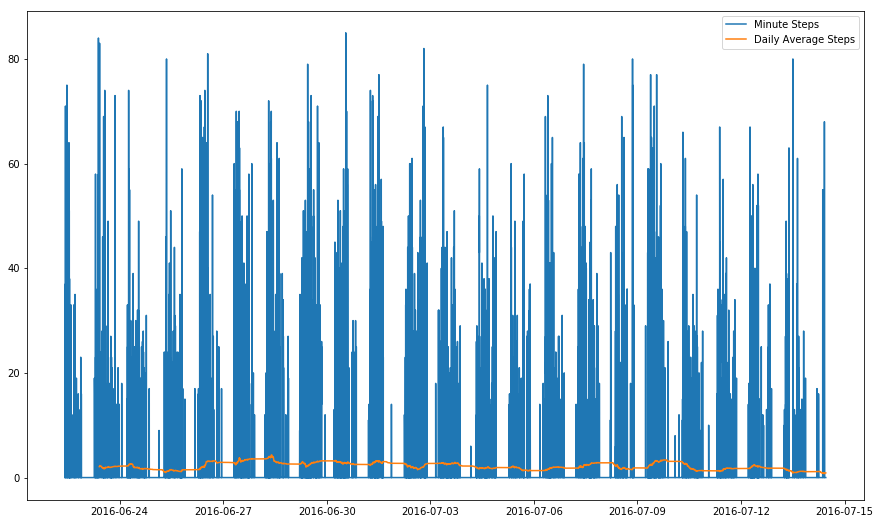

In [7]:
plt.figure(figsize = (15, 9))
plt.plot(df['Steps'], label = "Minute Steps")
plt.plot(df['Steps'].rolling(1440).mean(), label = "Daily Average Steps")
plt.legend(loc='best')

### How do the hourly average activities look like?

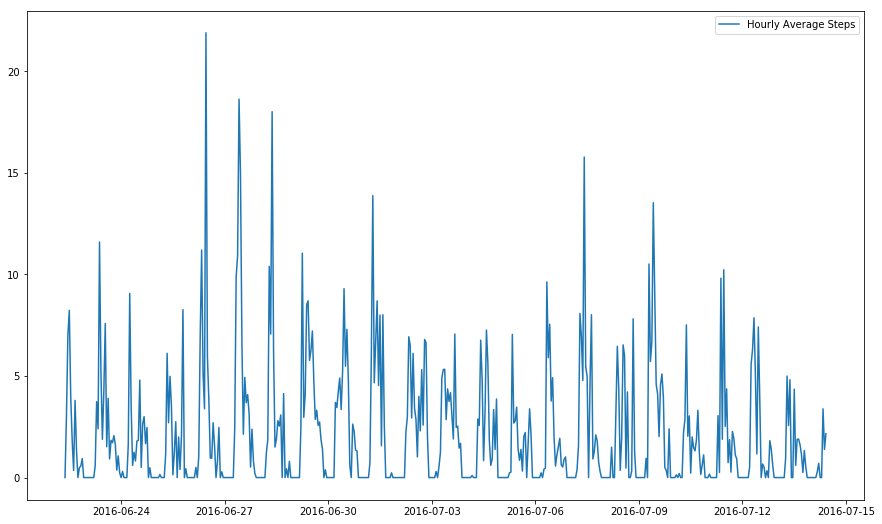

In [8]:
ts_hourly = df['Steps'].resample(rule="H").mean()
plt.plot(ts_hourly, label = "Hourly Average Steps")
plt.legend()

### How do the 15-minute average activities look like?

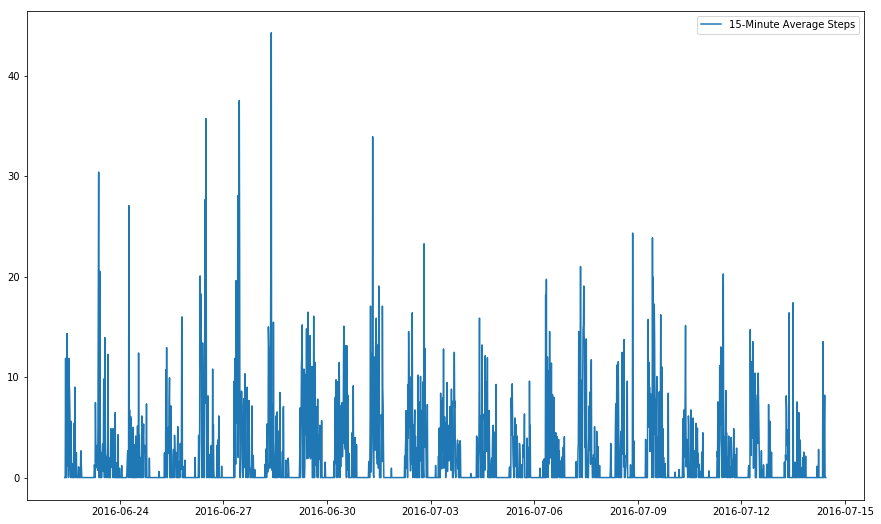

In [9]:
ts_quarterly = df['Steps'].resample('15T').mean()
plt.plot(ts_quarterly, label = "15-Minute Average Steps")
plt.legend()

### In terms of steps, how do the average activities change in a day (0:00-23:00)?

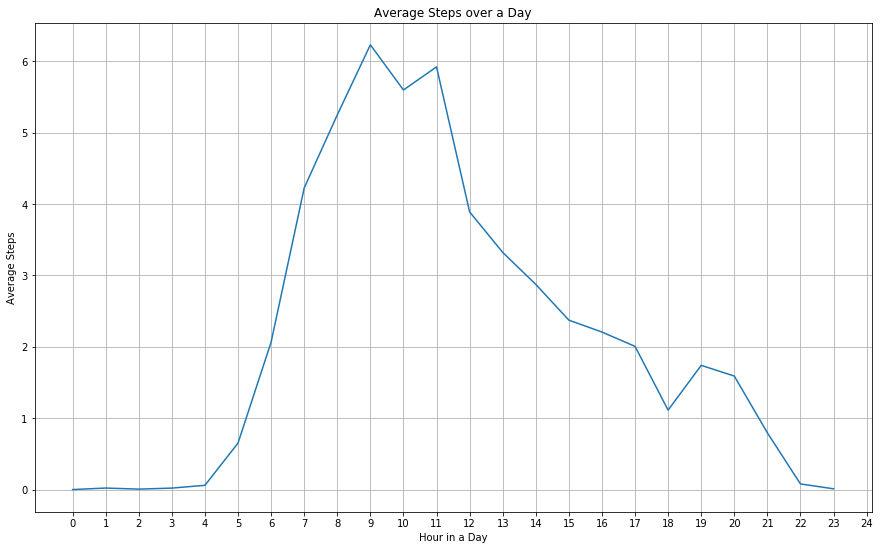

In [10]:
by_time = df[['Steps', 'Hour']].groupby('Hour').mean()
plt.plot(by_time)
plt.title("Average Steps over a Day")
plt.xticks(np.arange(25))
plt.xlabel("Hour in a Day")
plt.ylabel("Average Steps")
plt.grid()

#### As an interesting observation, this subject was active in every hour of a day on average. 

### OK, how does the boxplot of all the steps look like over all the hours in a day?

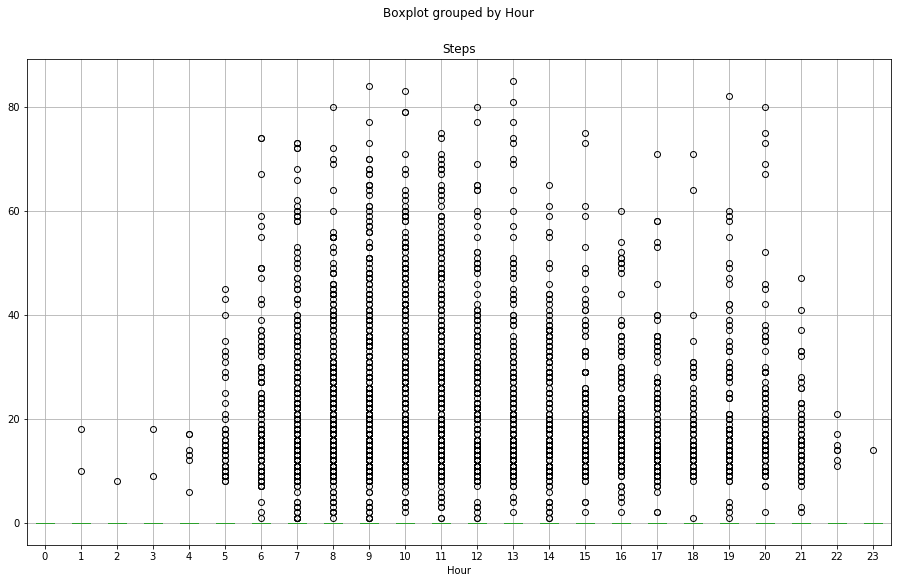

In [11]:
df.boxplot(column = 'Steps', by = 'Hour', figsize = (15, 9))

#### Again, this subject was active in every hour. However, in many hour points, the data points look like "outliers". It seems that the subject was inactive in most of the minutes in an hour.

### How do the activities in hours look iike if we factor the data by the wearSens field?

WearSens Specification:
- 0 = Non-Wear
- 1 = Wear
- 2 = Calibrating (the wear sensor calibrates for 10 seconds after it is unplugged from a docking station)
- 3 = Device is plugged into docking station

In [12]:
box_data = df[['Steps', 'Hour', 'WearSens']]

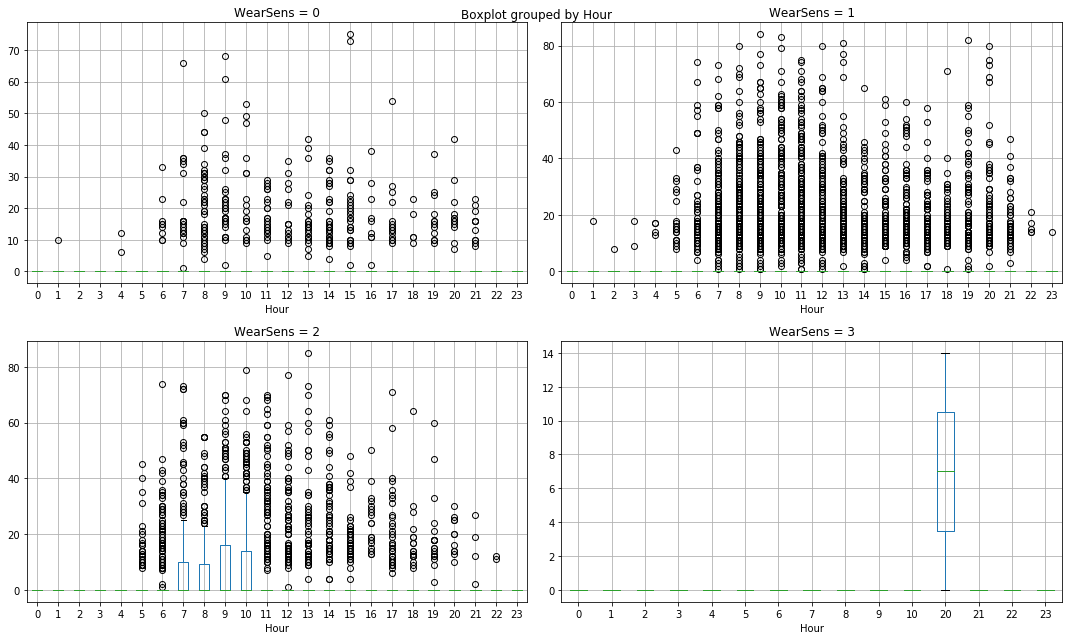

In [13]:
fig = plt.figure(figsize = (15, 9))
ax1 = fig.add_subplot(2, 2, 1)
box_data[box_data['WearSens'] == 0].boxplot(column = 'Steps', by = 'Hour', ax = ax1)
ax1.set_title("WearSens = 0")
ax2 = fig.add_subplot(2, 2, 2)
box_data[box_data['WearSens'] == 1].boxplot(column = 'Steps', by = 'Hour', ax = ax2)
ax3 = fig.add_subplot(2, 2, 3)
box_data[box_data['WearSens'] == 2].boxplot(column = 'Steps', by = 'Hour', ax = ax3)
ax4 = fig.add_subplot(2, 2, 4)
box_data[box_data['WearSens'] == 3].boxplot(column = 'Steps', by = 'Hour', ax = ax4)
ax2.set_title("WearSens = 1")
ax3.set_title("WearSens = 2")
ax4.set_title("WearSens = 3")
plt.tight_layout()

### OK, for the most active hour at 9:00, how did the subject move in each minute when wearing the monitor?

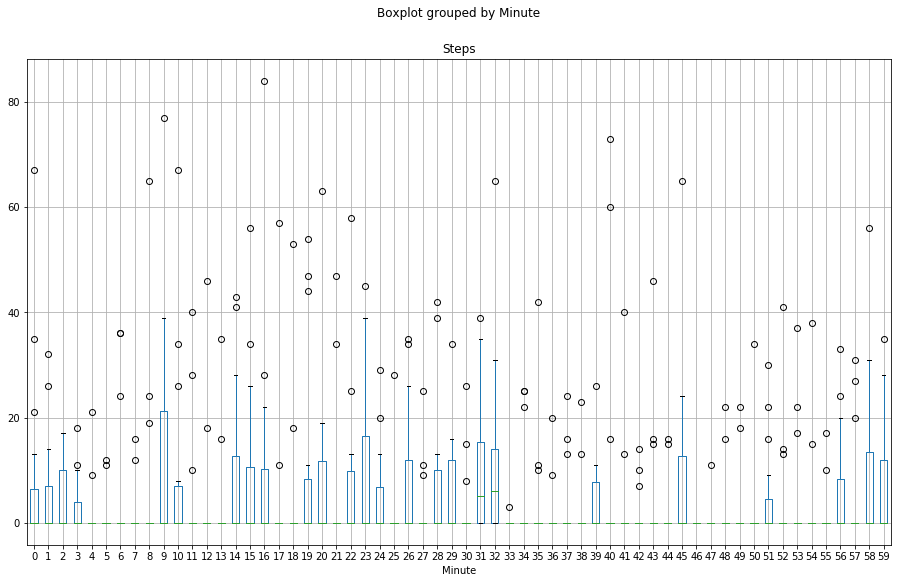

In [15]:
hour9 = df[df['Hour'] == 9]
hour9_wear1 = hour9[hour9.WearSens  == 1]
hour9_wear1.boxplot(column = "Steps", by = "Minute", figsize = (15, 9))

### Over the total 31740-minute records, how long did the subject wear the monitor?

In [16]:
df['WearSens'].value_counts()

1    19591
2     7015
0     4466
3      668
Name: WearSens, dtype: int64

#### The subject wore the monitor most of the time: 19591/31740.

### For each hour, what is the percentage of no activities (0 steps) on average?

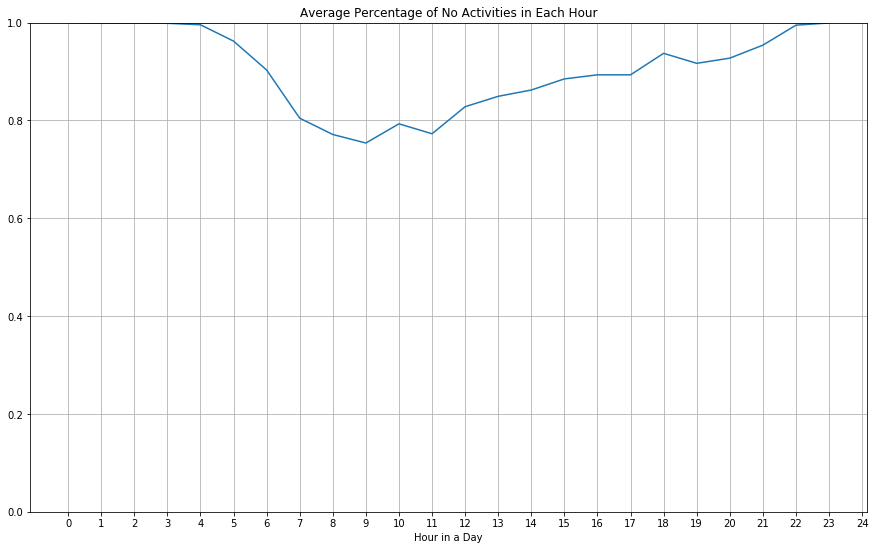

In [17]:
zero_perc = lambda g: (g == 0).sum() / g.shape[0]

plt.plot(df[['Steps', 'Hour']].groupby("Hour").agg(zero_perc))
plt.ylim((0,1))
plt.title("Average Percentage of No Activities in Each Hour")
plt.xlabel("Hour in a Day")
plt.xticks(np.arange(25))
plt.grid()

#### OK, this explains the 'outliers' in the boxplot. For each hour, about 80-100% of the minutes, there are no data. So the medians are 0. 

### How do the activity patterns look like in terms of weekdays?

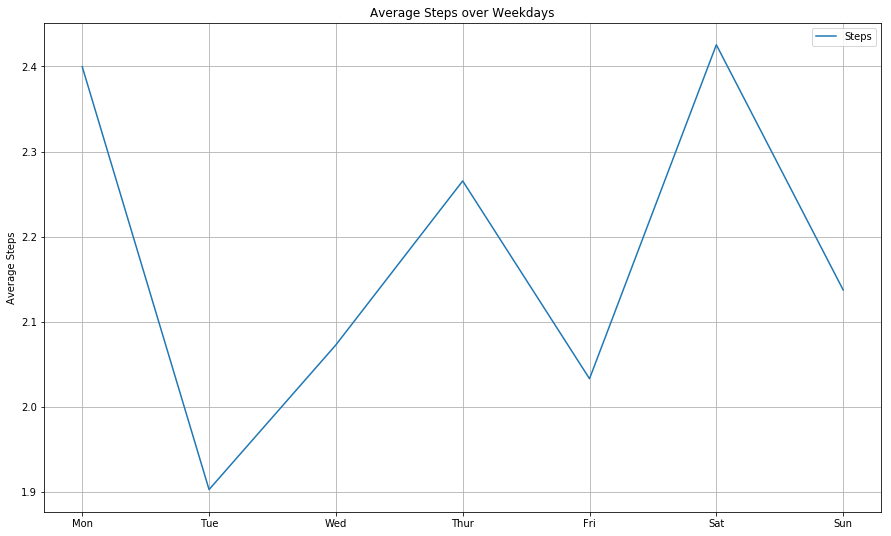

In [18]:
by_weekday = df[['Steps']].groupby(df.index.dayofweek).mean()
xticks = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
by_weekday.index = xticks
by_weekday.plot()
plt.xticks([0,1,2,3,4,5,6], xticks)
plt.ylabel("Average Steps")
plt.title("Average Steps over Weekdays")
plt.grid()

### How do the activity patterns look like in weekdays and weekend?

In [19]:
weekend = np.where(df.index.weekday < 5, 'weekday', 'weekend')
by_time = df.groupby([weekend, 'Hour']).mean()

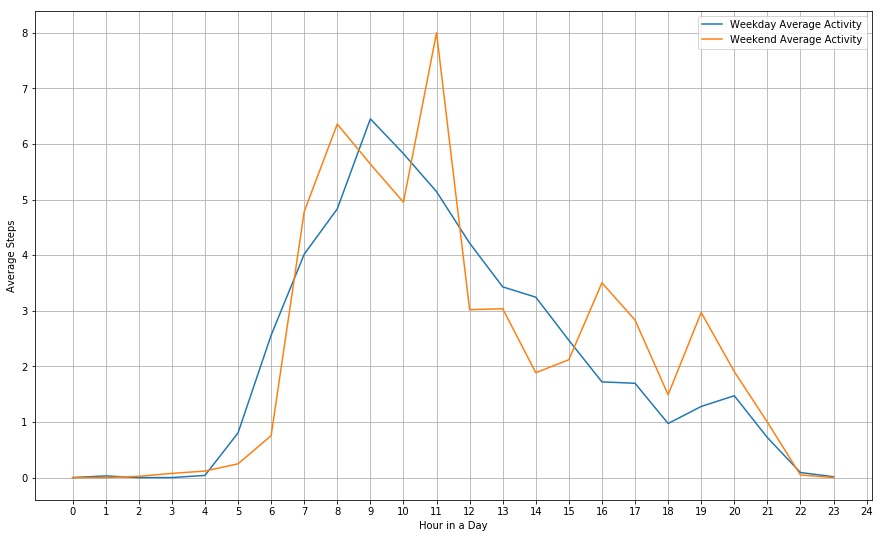

In [20]:
by_time.loc['weekday']['Steps'].plot(label = 'Weekday Average Activity')
by_time.loc['weekend']['Steps'].plot(label = "Weekend Average Activity")
plt.legend()
plt.xlabel("Hour in a Day")
plt.ylabel("Average Steps")
plt.xticks(np.arange(25))
plt.grid()